In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [3]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\mission_launches.csv")

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [6]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df.drop("Unnamed: 0.1", axis=1, inplace=True)

In [8]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [10]:
df.describe().transpose()

,count,unique,top,freq
Organisation,4324,56,RVSN USSR,1777
Location,4324,137,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",235
Date,4324,4319,"Wed Nov 05, 2008 00:15 UTC",2
Detail,4324,4278,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,6
Rocket_Status,4324,2,StatusRetired,3534
Price,964,56,450.0,136
Mission_Status,4324,4,Success,3879


In [11]:
df.isna().value_counts()

Organisation  Location  Date   Detail  Rocket_Status  Price  Mission_Status
False         False     False  False   False          True   False             3360
                                                      False  False              964
dtype: int64

In [12]:
df.isna()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4319,False,False,False,False,False,True,False
4320,False,False,False,False,False,True,False
4321,False,False,False,False,False,True,False
4322,False,False,False,False,False,True,False


In [13]:
df["Price"] = pd.to_numeric(df["Price"], errors="coerce", downcast="integer")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           949 non-null    float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [35]:
avrg_cost = df.groupby('Organisation')['Price'].mean()

df["Price"].fillna(avrg_cost, inplace=True)

In [36]:
# which org launched most missions and the mission details
missions_count_df = pd.DataFrame(df.groupby("Organisation").value_counts())
missions_count_df.head(10)

0
Organisation Location                                          Date                       Detail                                             Rocket_Status Price Mission_Status   
Arianespace  ELA-3, Guiana Space Centre, French Guiana, France Fri Apr 18, 2008 22:17 UTC Ariane 5 ECA | Star One C2 & Vinasat-1             StatusActive  200.0 1               1
                                                               Fri Apr 22, 2011 21:37 UTC Ariane 5 ECA | Yahsat 1A, Intelsat 28 (New Dawn)   StatusActive  200.0 1               1
                                                               Thu May 04, 2017 21:50 UTC Ariane 5 ECA | Koreasat 7, SGDC-1                  StatusActive  200.0 1               1
                                                               Thu Aug 20, 2015 20:34 UTC Ariane 5 ECA | Eutelsat 8 West B, Intelsat 34      StatusActive  200.0 1               1
                                                               Thu Aug 29, 2013 20:30 UTC Ariane 5 ECA | Eutelsat 25B/Es'hail 1, GSAT-7      StatusActive  200.0 1               1
                                                               Thu Feb 06, 2014 21:30 UTC Ariane 5 ECA | ABS-2, Athena-Fidus                 StatusActive  200.0 1               1
                                                               Thu Feb 07, 2013 21:36 UTC Ariane 5 ECA | Amazonas-3, Azerspace-1 (Africas... StatusActive  200.0 1               1
                                                               Thu Feb 12, 2009 22:09 UTC Ariane 5 ECA | Hot Bird 10, NSS-9, Spirale-A & B   StatusActive  200.0 1               1
                                                               Thu Jan 16, 2020 21:05 UTC Ariane 5 ECA | Eutelsat Konnect BB4A & GSAT-30     StatusActive  200.0 1               1
                                                               Thu Jan 25, 2018 22:20 UTC Ariane 5 ECA | SES-14/GOLD & Al Yah-3              StatusActive  200.0 0               1

In [37]:
#total missions each org has launched
total_mission_counts= df["Organisation"].value_counts()

mx_mission_org = total_mission_counts.idxmax()
print(total_mission_counts)
print(f"max missions are lauched by: {mx_mission_org}")

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [38]:
mission_cost_per_org = df.groupby("Organisation")["Price"].sum()
total_price_df = pd.DataFrame(mission_cost_per_org)


print(f"Maximum total cost of a mission : {total_price_df.max()}\n")
print(f"Org with max total cost : {total_price_df.idxmax()}")

Maximum total cost of a mission : Price    61200.0
dtype: float64

Org with max total cost : Price    NASA
dtype: object


In [39]:
success_fail_count = df.groupby("Organisation")["Mission_Status"].value_counts()
mission_stat = pd.DataFrame(success_fail_count)

mission_stat

Mission_Status
Organisation Mission_Status                
AEB          0                            3
AMBA         0                            4
             1                            4
ASI          1                            9
Arianespace  1                          269
...                                     ...
VKS RF       1                          188
             0                           13
Virgin Orbit 0                            1
Yuzhmash     1                            2
i-Space      1                            1

[96 rows x 1 columns]

In [40]:
success_count = df[df['Mission_Status'] == 'Success'].groupby("Organisation")["Mission_Status"].count()
mx_success = success_count.idxmax()

print(f"Org with max successful missions: {mx_success}")

ValueError: attempt to get argmax of an empty sequence

In [41]:
org_name = input("Enter an org name here: ")

org_data = df[df["Organisation"] == org_name]
org_data

Enter an org name here: NASA


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
682,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Jul 08, 2011 15:29 UTC",Space Shuttle Atlantis | STS-135,StatusRetired,450.0,1
687,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon May 16, 2011 12:56 UTC",Space Shuttle Endeavour | STS-134,StatusRetired,450.0,1
695,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Thu Feb 24, 2011 21:53 UTC",Space Shuttle Discovery | STS-133,StatusRetired,450.0,1
726,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri May 14, 2010 18:20 UTC",Space Shuttle Atlantis | STS-132,StatusRetired,450.0,1
733,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Apr 05, 2010 10:21 UTC",Space Shuttle Discovery | STS-131,StatusRetired,450.0,1
...,...,...,...,...,...,...,...
4243,NASA,"LC-5, Cape Canaveral AFS, Florida, USA","Mon Nov 21, 1960 14:00 UTC",Mercury-Redstone | Mercury-Redstone 1 (MR-1),StatusRetired,NaN,0
4257,NASA,"LC-14, Cape Canaveral AFS, Florida, USA","Fri Jul 29, 1960 13:13 UTC",Atlas-D Mercury | Mercury-Atlas 1 (MA-1),StatusRetired,NaN,0
4280,NASA,"LC-14, Cape Canaveral AFS, Florida, USA","Wed Sep 09, 1959 08:19 UTC",Atlas-D Mercury | Big Joe 1,StatusRetired,NaN,0
4296,NASA,"SLC-17A, Cape Canaveral AFS, Florida, USA","Sat Nov 08, 1958 07:30 UTC",Thor-DM 18 Able I | Pioneer 2,StatusRetired,NaN,0


In [42]:
fig = px.line(org_data, x="Date", y="Price",title=f'Price Changes for {org_name} Missions')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Price')
fig.show()

In [22]:
rocket_status = df.groupby("Organisation")["Rocket_Status"].value_counts()
rocket_status_df = pd.DataFrame(rocket_status)

rocket_status_df

Rocket_Status
Organisation Rocket_Status               
AEB          StatusActive               3
AMBA         StatusRetired              8
ASI          StatusRetired              9
Arianespace  StatusRetired            165
             StatusActive             114
...                                   ...
VKS RF       StatusRetired            174
             StatusActive              27
Virgin Orbit StatusActive               1
Yuzhmash     StatusRetired              2
i-Space      StatusActive               1

[74 rows x 1 columns]

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Price', ylabel='Density'>

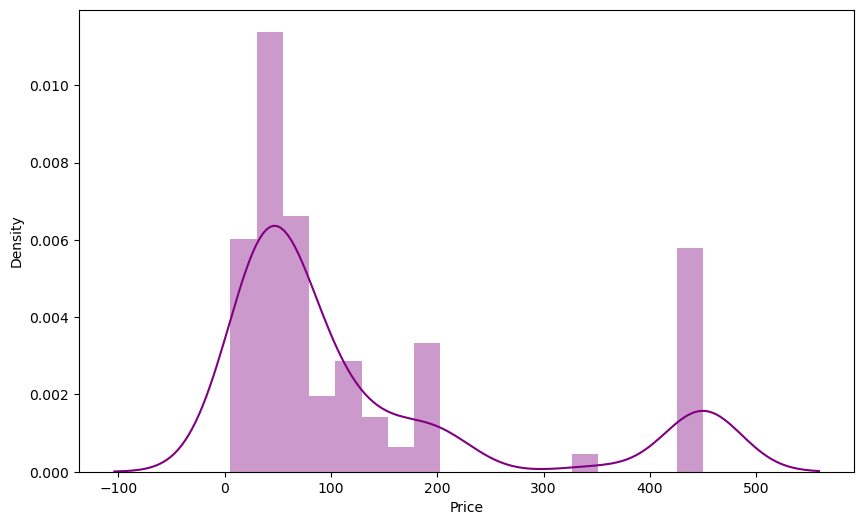

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(df["Price"], color="purple")

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Mission_Status', ylabel='count'>

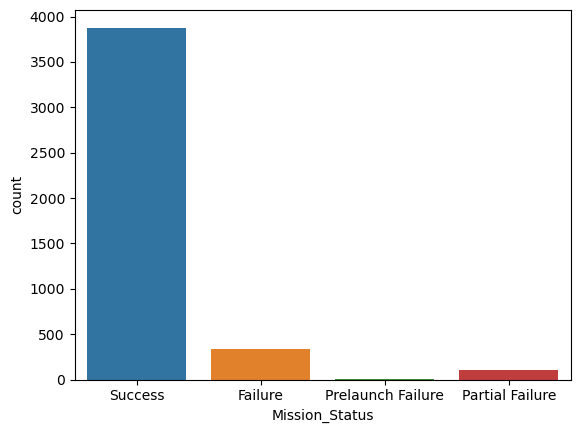

In [24]:
sns.countplot(df["Mission_Status"])

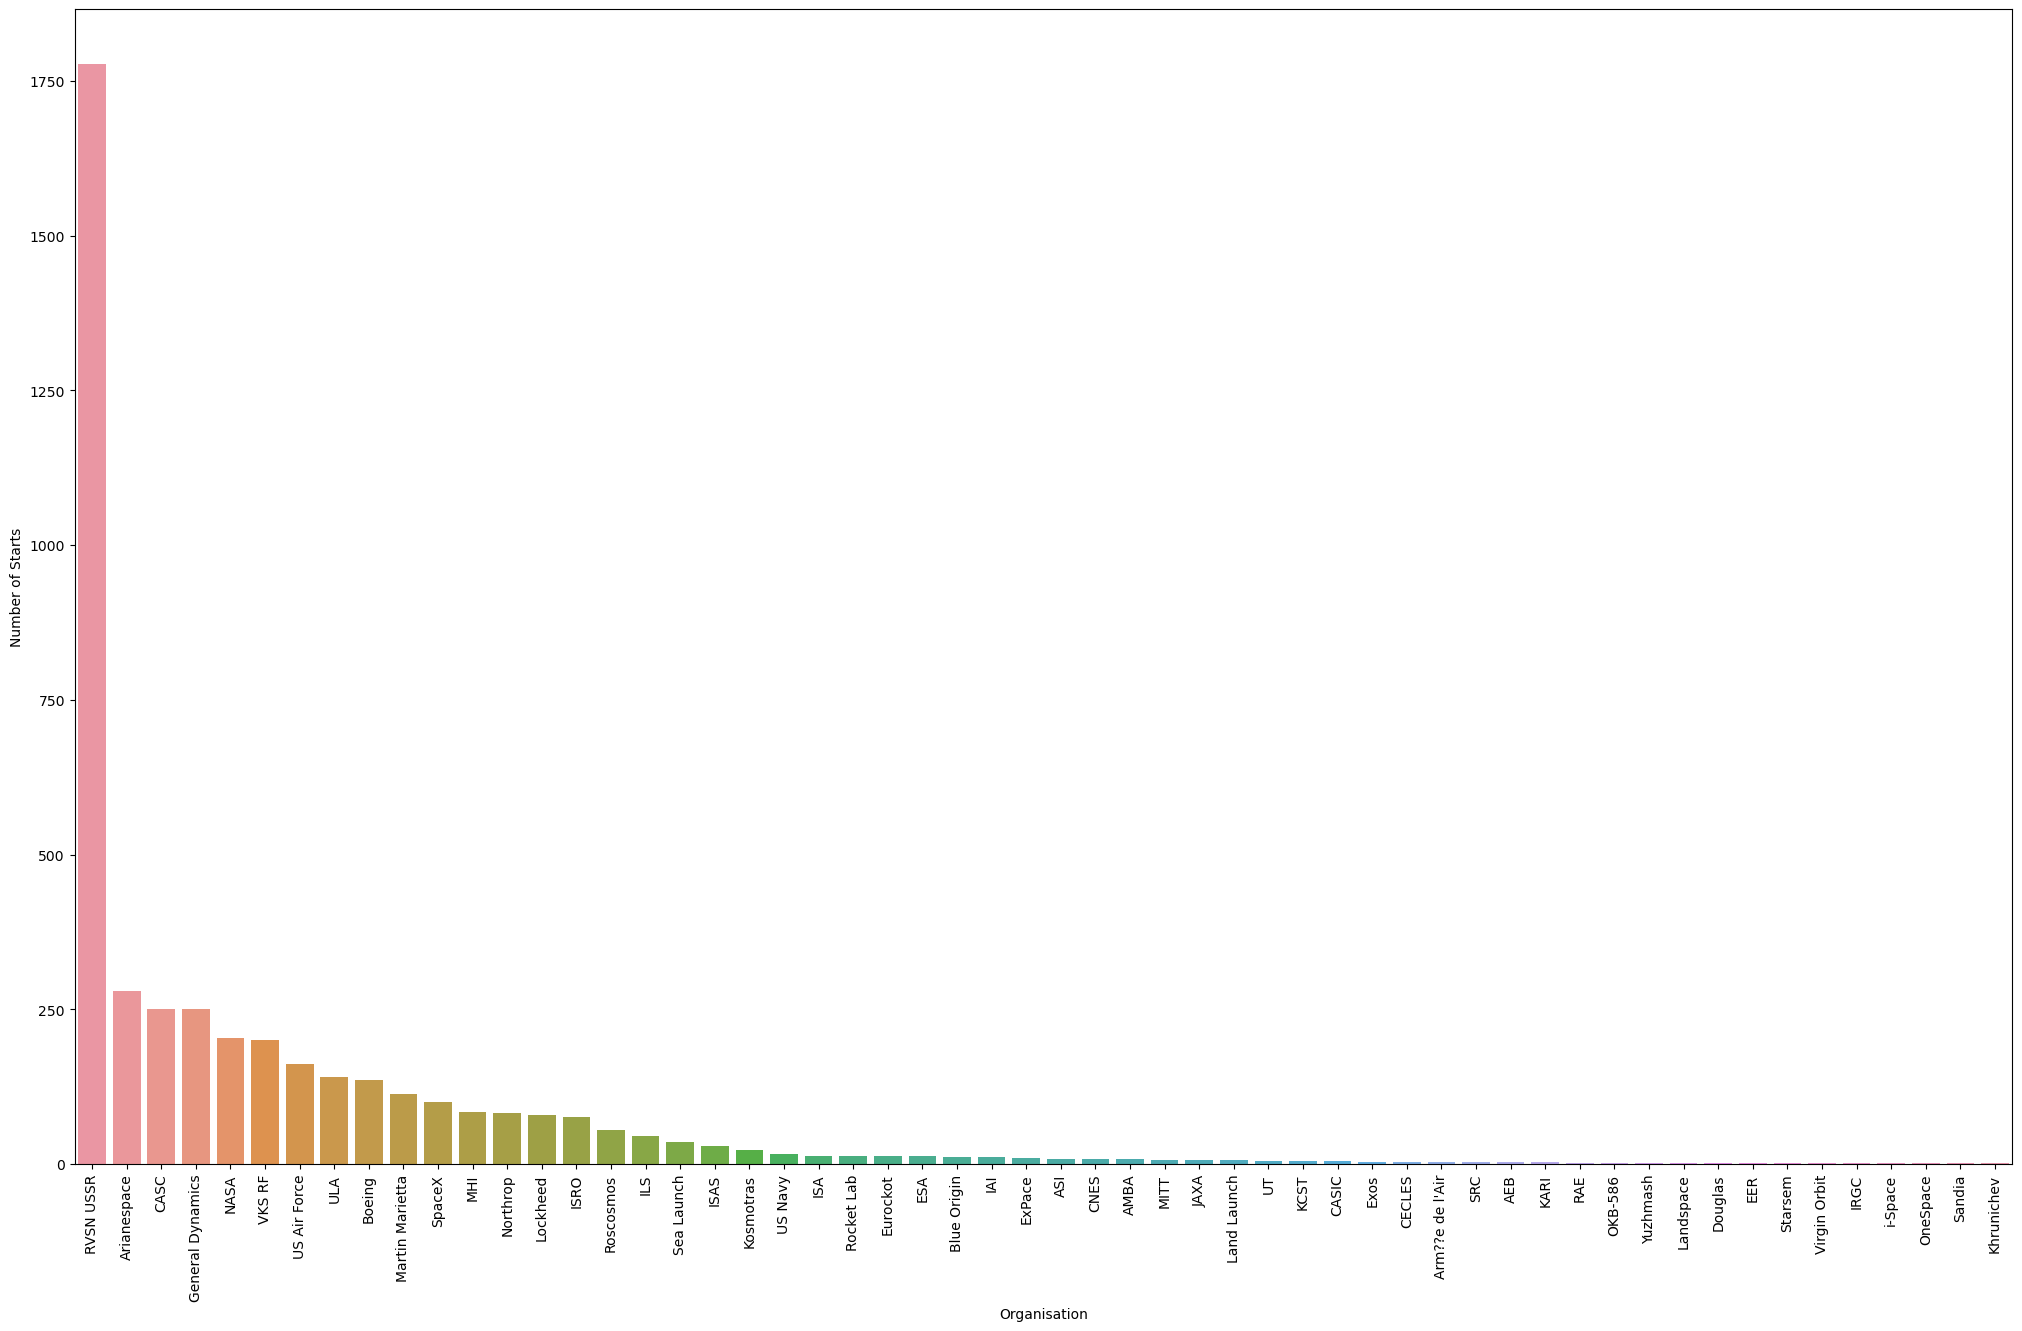

In [25]:
missions_by_org = df["Organisation"].value_counts().reset_index()
missions_by_org.columns = ["Organisation", "Number of Starts"]


missions_by_org = missions_by_org.sort_values("Number of Starts", ascending=False)

plt.figure(figsize=(25,15))
p = sns.barplot(x=missions_by_org["Organisation"], y=missions_by_org["Number of Starts"])
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.show()

In [26]:
ds = df["Mission_Status"].value_counts().reset_index()
ds.columns = ['Mission_status', 'count']


fig = px.pie(
    ds, 
    values='count', 
    names="Mission_status", 
    title='Success and Failure of the Rocket Missions', 
    width=500, 
    height=500,
    hole = 0.4
)

fig.update_layout( title_x = 0.5)
fig.show()

In [27]:
df.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [28]:
df["Mission_Status"] = df["Mission_Status"].apply(lambda x: 1 if x == "Success" else 0)

In [29]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,1
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,1
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,1
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,1


In [33]:
x = df[['Price']].values
y = df['Mission_Status'].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

model = LogisticRegression()
model.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').